## PRACTICAL PART

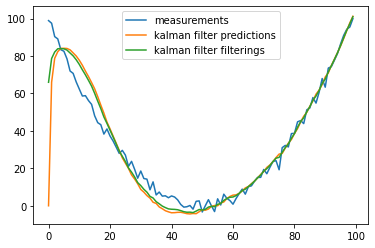

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class KalmanFilter(object):
    def __init__(self, F = 0, H = 0, D = 0, R = 0, P = 0, x0 = 0):
        self.F = F
        self.H = H
        self.D = np.eye(F.shape[1]) if D is 0 else D
        self.R = np.eye(F.shape[1]) if R is 0 else R
        self.P = np.eye(F.shape[1]) if P is 0 else P
        self.x = np.zeros((F.shape[1], 1)) if x0 is 0 else x0

    def prediction(self):
        self.x = np.dot(self.F, self.x)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.D
        return self.x

    def filtering(self, z):
        v = z - np.dot(self.H, self.x)
        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R
        W = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        self.x = self.x + np.dot(W, v)
        I = np.eye(self.F.shape[1])
        self.P = np.dot(np.dot(I - np.dot(W, self.H), self.P), (I - np.dot(W, self.H)).T) + np.dot(np.dot(W, self.R), W.T)

def run():
	delta_t = 2.0/60
	F = np.array([[1, delta_t, 1/2*delta_t**2], 
                  [0, 1, delta_t], 
                  [0, 0, 1]])
	H = np.array([1, 0, 0]).reshape(1, 3)
	D = np.array([[1/4*delta_t**4, 1/2*delta_t**3, 1/2*delta_t**2], 
                  [1/2*delta_t**3, delta_t**2, delta_t], 
                  [1/2*delta_t**2, delta_t, 1]])
	R = np.array([0.5]).reshape(1, 1)
    
	x = np.linspace(-10, 10, 100)
	measurements = x*x + np.random.normal(0, 2, 100)

	kalman = KalmanFilter(F = F, H = H, D = D, R = R)
	predictions = []
	filterings = []
    
	for z in measurements:
		predictions.append(np.dot(H,  kalman.prediction())[0])
		kalman.filtering(z)
		filterings.append(kalman.x[0])
    
	plt.plot(range(len(measurements)), measurements, label = 'measurements')
	plt.plot(range(len(predictions)), np.array(predictions), label = 'kalman filter predictions')
	plt.plot(range(len(filterings)), np.array(filterings), label = 'kalman filter filterings')
	plt.legend()
	plt.show()

if __name__ == '__main__':
    run()

Here kalman Filter has x = [position, velocity] that takes plot for the x^2 function. It shows the measurements with small noise, then apply prediction step then filtering step by updating x and p as for the Piecewise Constant White Acceleration Model, yet gives smooter results

## THEORITICAL PART

## 1) 
"
Consider the past: $l < k$ !

The retrodiction densities must be calculated. In this case $p(X_l|Z^k)$.

$p(X_l|Z^k)=\int dX_{l+1}p(X_l,X_{l+1}|Z^k)=\int dX_{l+1}p(X_l|X_{l+1},Z^k)p(X_{l+1}Z^k)$

And following Bayes' theorem:

$p(X_l|X_{l+1},Z^k)=p(X_l|X_{l+1},Z ^l)=\frac{p(X_{l+1}|X_l)p(X_l|Z^l)}{\int dX_lp(X_{l+1}|X_l)p(X_l|Z^l)}$

The retrodiction update equation for $p(X_l|Z^k)$ is given by:

$p(X_l|Z^k)=\int dX_{l+1}\frac {p(X_{l+1}|X_l)p(X_l|Z^l)}{p(X_{l+1}|Z^l)}p(X_{l+1}Z^k)$

and combines the previously obtained retrodiction, filtering and prediction densities as well as the object evolution model.

- Retrodictrion applies to single as well as multiple objects, to well-separated objects, object formations, and objects characterized by a more general state.

- The retrodicted density for time $l$ is completely determined by the filtering density at time $l$ and the following instants of time up to the present ($l \leq k$). Retrodiction is thus decoupled from filtering and prediction and may be switched off without affecting the tracking filter performance (e.g. in overload situations).

- Accurate filtering and prediction is prerequisite to accurate retrodiction. Provided these processing steps were performed approximately optimally. the retrodiction loop provides an approximately optimal description of the past object states.

- Besides making use of the underlying evolution model of the objects, retrodiction refers to no other modeling assumption. In particular, the sensor data are not reprocessed by retrodiction. 

- Retrodiction can provide highly precise reconstruction on object trajectory, including their velocity and acceleration histories that may contribute to object classification.

- The classification of an air target as a helicopter, for example, could be based on precisely retrodicted velocity estimates equal to zero. Since such retrodiction based classifications have impact on the evolution model chosen for the future, the example illustrates in which way retrodiction results may improve available knowledge even on present and future object states.
"

Resource: W. Koch (2014), Tracking and Sensor Data Fusion, Springer mathematical Engineering Series, page 71-72.

## 2) 
Because withing retrodiction we transform into a past state. Namely as we discussed above retrodiction can be decoupled, we can think as independent from other parts. 

- The retrodicted density for time $l$ is completely determined by the filtering density at time $l$ and the following instants of time up to the present ($l \leq k$). Retrodiction is thus decoupled from filtering and prediction and may be switched off without affecting the tracking filter performance (e.g. in overload situations).

Also in particular sensor data are not reprocessed by retrodiction. The retrodiction loop provides an approximately optimal description of the past object states.

Resource: W. Koch (2014), Tracking and Sensor Data Fusion, Springer mathematical Engineering Series, page 71-72.

## 3)
"
Above equation by using the product formula for
Gaußians, which is $p(X_l|X_{l+1},Z^k)$ can be written as:

$p(X_l|X_{l+1}, Z^l)=\frac{N(X_{l+1};F_{l+1|x_l},D_{l+1|l})N(X_l;X_{l|l},P_{l|l})}{N(X_{l+1};X_{l+1|l},P_{l+1|l})}$

$=N(X_l;h_{l|l+1}(X_{l+1}),R_{l|l+1})$

Also $N(X_l;h_{l|l+1}(X_{l+1}),R_{l|l+1})$ can be interpreted in analogy to a Gaußian likelihood function with a linear measurement function $h_{l|l+1}(x_{l+1})$. For this reason a second use of the product finally yields: 

$p(x_l|Z^k)=\int dx_{l+1}p(x_l|x_{l+1},Z^k)N(x_{l+1};x_{l+1|k}, P_{l+1|k})$
$=N(x_l;x_{l|k}, P_{l|k})$


Also under certain conditions, where Kalman filtering is applicable, the Markov transition density $p(X_{l+1}|X_{l+θ})$ is given by the Gaußian:

$p(x_{l+1}|x_{l+θ})=N(x_{l+1};F_{l+1|l+θ}x_{l+θ},D_{l+1|l+θ})$ yielding as a special case of $N(X_l;h_{l|l+1}(X_{l+1}),R_{l|l+1})$
"

Resource: W. Koch (2014), Tracking and Sensor Data Fusion, Springer mathematical Engineering Series, page 72-73.

## 4)
$C=(\frac{1}{A}+\frac{1}{B})=\frac{AB}{A+B}$ \
$c=\frac{AB}{A+B}(\frac{a}{A}+\frac{b}{B}=\frac{aB+bA}{A+B})$ \
$N(X;a,A)N(x;b,B)=\frac{1}{\sqrt{2N}\sqrt{A}}e^{\frac{-1(x-a)^2}{2A}}\frac{1}{\sqrt{2N}\sqrt{B}}e^\frac{-1(x-b)^2}{2B}$ \
$=\frac{1}{2N\sqrt{AB}}e^{\frac{-1}{2}(\frac{(x-a)^2}{A}+\frac{(x-b)^2}{B})}$ \
$(apply *)=\frac{1}{2N\sqrt{\frac{AB}{A+B}}}e^{\frac{-1}{2}(x-\frac{aB+bA}{A+B})^2\frac{A+B}{AB}}\frac{1}{\sqrt{2N}\sqrt{A+B}}e^{\frac{-1}{2}(a-b)^2\frac{1}{A+B}}$ \
$=\frac{1}{2N\sqrt{AB}}e^{\frac{-1}{2}(x-c)^2\frac{1}{c}}e^{\frac{-1}{2}(a-b)^2\frac{1}{A+B}}$ \
$=N(X;c,C).N(a;b,A+B)$ (it is proven by the product formula) \
$(*) \frac{B(x-a)^2+A(x-b)^2}{AB}= \frac{(A+B)x^2-2x(aB+BA)+Ba^2+Ab^2}{AB} $ \
$=\frac{(x-\frac{aB+bA}{A+B})^2(A+B)+(a-b)^2\frac{AB}{A+B}}{AB}$
